`https://www.linkedin.com/in/richardfwijaya/`

# Objective

___
 Objective : Doing a Sentiment Analysis model with a LSTM
___

___
 Expected Output : The Model able to classify Negative, Positive and Neutral sentiment based on text
___

#Understanding About the Model

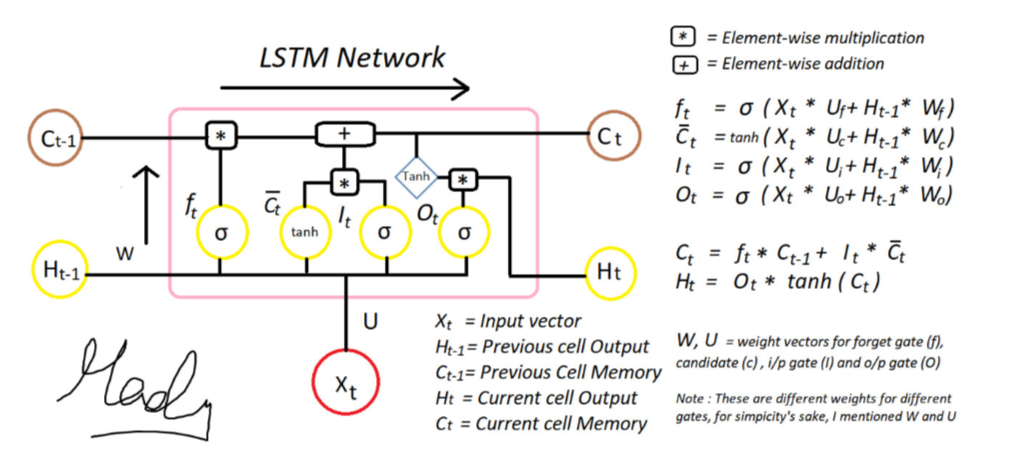

Komponent of LTSM
*   C_t = Memory Bank that carries relevant information
Gates
*   F_t = Forget Gate, decide what information should be discarded
*   I_t and Candidate Values (\tilde{C}_t):= Input Gate, decide what information should be added
*   O_t = Output Gate, Decides what part of the cell state should be output
*   H_t = Represents the output of the LSTM unit at each time step, which is used for making predictions and passed on to the next time step.

Dictionary:
1.   σ denotes the sigmoid function.
2.   ∗ represents element-wise multiplication.
3.   W and b are learnable weights and biases.


Sources : [Linkedin](https://www.linkedin.com/pulse/chapter-101-deepnlp-lstm-long-short-term-memory-math-sanjeevi-mady-/)

**Definition**

LSTM (Long Short Term Memory) is a type of recurrent of Neural Network to handle sequential data (any type of data arranged where order matters) and overcome some of the limitation of traditional RNN

Limitation of traditional RNN

> Recurrent Neural Networks (RNNs): These are neural networks designed to recognize patterns in sequences of data, such as time series or natural language. They maintain a hidden state that captures information about previous elements in the sequence, allowing them to make predictions based on both current and past inputs.

> Traditional RNNs struggle with learning long-term dependencies due to issues like the vanishing and exploding gradient problems. This means they have difficulty retaining information over long sequences, which is crucial for tasks like language modeling where context from earlier in the text can influence understanding and generation later on.





#Library

Import Neccesary Library to perform LSTM

In [ ]:
# Import NumPy for numerical operations and array manipulation
import numpy as np

# Import Pandas for data manipulation and analysis (working with structured data in DataFrames)
import pandas as pd

# Import TensorFlow, a deep learning library for building and training neural networks
import tensorflow as tf

# Import Matplotlib's pyplot for plotting graphs and visualizing data
import matplotlib.pyplot as plt

# Import Keras's Tokenizer to convert text into sequences of integers for model input
from tensorflow.keras.preprocessing.text import Tokenizer

# Import Sequential model class from Keras to create a linear stack of neural network layers
from tensorflow.keras.models import Sequential

# Import re for regular expression operations to clean text
import re

# Import various neural network layers from Keras
from tensorflow.keras.layers import (
    LSTM,        # Long Short-Term Memory layer for sequence processing (e.g., text)
    Dense,       # Fully connected layer for output
    Flatten,     # Flattens the input into a 1D array, typically used before Dense layers
    Embedding,   # Converts words into dense vector embeddings
    Dropout,     # Regularization layer to prevent overfitting by randomly dropping neurons during training
    Input,       # Layer that defines the shape of input data
    Bidirectional # Wraps the LSTM layer to process sequences in both forward and backward directions
)

# Import pad_sequences to ensure all sequences have the same length by padding shorter sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import LabelEncoder to convert categorical labels (e.g., text labels) into numeric format
from sklearn.preprocessing import LabelEncoder

# Import classification_report to evaluate model performance using precision, recall, and F1-score metrics
from sklearn.metrics import classification_report

# Import Natural Language Toolkit (nltk) for text processing tasks
import nltk
from nltk.tokenize import word_tokenize   # For tokenizing text into words
from nltk.corpus import stopwords         # To access a list of common stopwords
from nltk.stem import WordNetLemmatizer   # For lemmatizing words to their base form

In [ ]:
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
nltk.data.path.append("/kaggle/working/nltk_data/")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...


Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/README  
  inflating: /kaggle/w

#Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
col = ['ID','Platform','Label','Tweet']
training = pd.read_csv('/content/drive/MyDrive/Self Project Datasets/Data Twitter/twitter_training.csv',names=col)

In [ ]:
col = ['ID','Platform','Label','Tweet']
test = pd.read_csv('/content/drive/MyDrive/Self Project Datasets/Data Twitter/twitter_validation.csv',names=col)

# Datasets Assessment

In [ ]:
df_train = training.copy()
df_test = test.copy()

In [ ]:
training.head()

,ID,Platform,Label,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
test.head()

,ID,Platform,Label,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


# Data Cleaning

## Remove Unneccesary Column

In [ ]:
#Remove ID and Platform Column in test and training
training = training.drop(['ID','Platform'],axis=1)
test = test.drop(['ID','Platform'],axis=1)

## Convert two datasets into one

In [ ]:
sentiment=pd.concat([training,test],ignore_index=True)
sentiment

,Label,Tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   75682 non-null  object
 1   Tweet   74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


## Check Null Value

In [ ]:
#Check null value
sentiment.isnull().sum()

,0
Label,0
Tweet,686


In [ ]:
#Remove Null Value
sentiment.dropna(inplace=True)
sentiment.isnull().sum()

,0
Label,0
Tweet,0


## Check Double Value

In [ ]:
#Check Double Value
sentiment.duplicated().sum()

4744

In [ ]:
#Remove duplicate value
sentiment.drop_duplicates(inplace=True)

In [ ]:
sentiment.duplicated().sum()

0

## Cleaning Text

In [ ]:
def clean_text(text):
    # Remove extra whitespace from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove all special characters from text
    text = re.sub(r'\W', ' ', str(text))

    # Remove all single characters from text
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove any character that isn't alphabetical
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert all text to lowercase
    text = text.lower()

    # Tokenize the cleaned text into individual words
    words = word_tokenize(text)

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize each word to its base form
    words = [lemmatizer.lemmatize(word) for word in words]

    # Create a set of stop words in English
    stop_words = set(stopwords.words("english"))

    # Remove stop words from the tokenized words
    Words = [word for word in words if word not in stop_words]

    # Remove words that are 3 characters or fewer
    Words = [word for word in Words if len(word) > 3]

    # Get unique words while maintaining their order
    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    # Return the cleaned list of words
    return cleaned_text

In [ ]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70252 entries, 0 to 75678
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   70252 non-null  object
 1   Tweet   70252 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


# Model Preparation

In [ ]:
x=sentiment.drop('Label',axis=1)
y=sentiment.Label

## Convert Tweet into Text

In [ ]:
texts = list(x['Tweet']) # Changed 'text' to 'Tweet'

In [ ]:
import nltk
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Applied Data Cleaning into the column

In [ ]:
# Apply the clean_text function to each element in the texts list
cleaned_text = [clean_text(text) for text in texts]

In [ ]:
print(cleaned_text[:15])

[['getting', 'borderland', 'murder'], ['coming', 'border', 'kill'], ['getting', 'borderland', 'kill'], ['coming', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'twitter', 'mlsiwfjg'], ['spent', 'couple', 'hour', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'picture', 'compared', 'creation', 'made', 'twitter', 'mlsiwfjg'], ['spent', 'hour', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'rhandlerr', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'twitter', 'mlsiwfjg'], ['spent', 'hour', 'making', 'something

## Preparing X Test and Y Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

## Convert Text into Numerical Format

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab = 20000 #control size of the input data
tokenizer = Tokenizer(num_words=max_vocab) #Convert text into numerical format
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

the size of vocab = 24148


In [ ]:
maxlen = 100  # Set the maximum length for the sequences

# Pad the training and test sequences to ensure uniform length, truncating or padding as needed
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
y.value_counts()

,count
Label,
Negative,21329
Positive,19271
Neutral,17281
Irrelevant,12371


#Build The Model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,GlobalMaxPooling1D,Dropout,Bidirectional
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
from tensorflow.keras.optimizers import Adam

D=100
inputt=Input(shape=(maxlen, ))

## Setting the Learning Rate and Optimizer

In [ ]:
learning_rate = 0.0001 #Set the learning rate, 0.0001 is
x = Embedding(v+1,D)(inputt)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(150))(x)
x = Dense(32, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## Training the model for class labels

In [ ]:
# Convert class labels to one-hot encoded format for training and testing
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

# Train the model for 40 epochs, using the training data and validating on the test data
history = model.fit(X_train, y_train_one_hot, epochs=40, validation_data=(X_test, y_test_one_hot))

Epoch 1/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.3607 - loss: 1.3186 - val_accuracy: 0.5618 - val_loss: 1.0406
Epoch 2/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.6058 - loss: 0.9644 - val_accuracy: 0.6590 - val_loss: 0.8544
Epoch 3/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.7020 - loss: 0.7694 - val_accuracy: 0.7292 - val_loss: 0.7085
Epoch 4/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7664 - loss: 0.6192 - val_accuracy: 0.7740 - val_loss: 0.6072
Epoch 5/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8081 - loss: 0.5162 - val_accuracy: 0.8005 - val_loss: 0.5398
Epoch 6/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8333 - loss: 0.4464 - val_accuracy: 0.8130 - val_loss: 0.5024
Epoch 7/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8506 - loss: 0.4026 - val_accuracy: 0.8246 - val_loss: 0.4774
Epoch 8/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8643 -

## Evaluate The Model

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8847 - loss: 0.4182
Test Loss: 0.43028154969215393
Test Accuracy: 0.8836382031440735


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=['Negative', 'Positive', 'Neutral', 'Irrelevant'])
print(report)


              precision    recall  f1-score   support

    Negative       0.88      0.85      0.86      2445
    Positive       0.86      0.93      0.89      4288
     Neutral       0.91      0.88      0.89      3522
  Irrelevant       0.90      0.86      0.88      3796

    accuracy                           0.88     14051
   macro avg       0.89      0.88      0.88     14051
weighted avg       0.88      0.88      0.88     14051



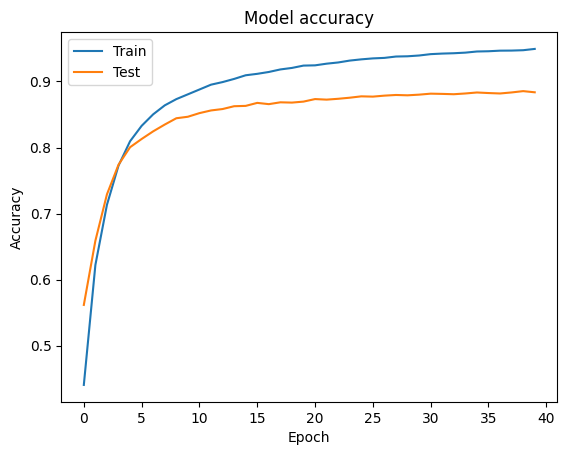

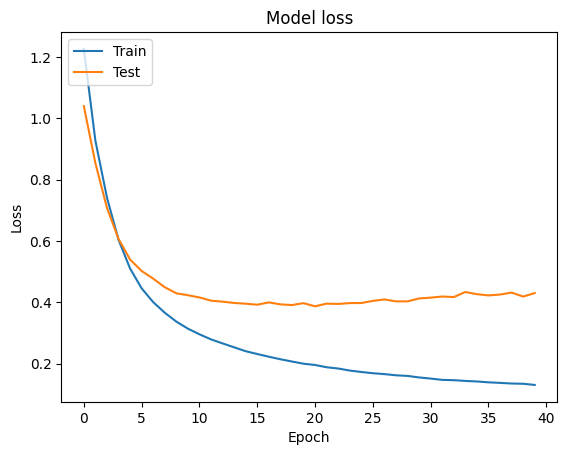

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Confusion Matrix

440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


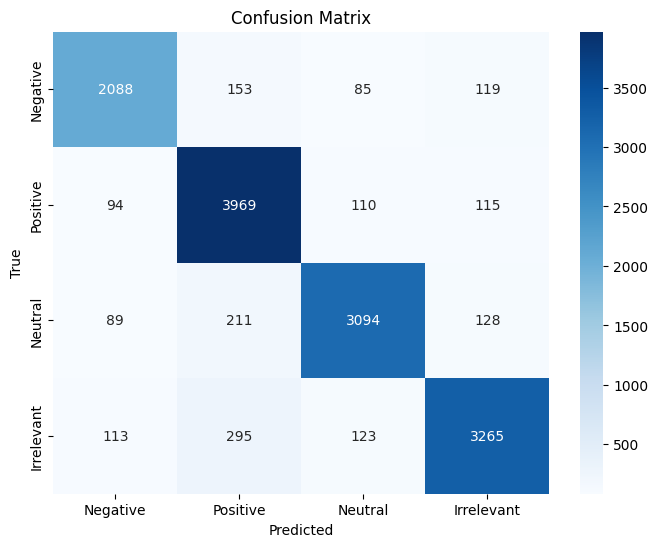

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive', 'Neutral', 'Irrelevant'],
            yticklabels=['Negative', 'Positive', 'Neutral', 'Irrelevant'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()